In [84]:
library(tidyverse)
library(cowplot)
library(e1071)
library(ggrepel)

In [6]:
cars_df <- as_tibble(cars)

In [8]:
names(cars_df)

[1] "speed" "dist"

# Exploratory plots

## Scatter plot (with line & confidence interval)

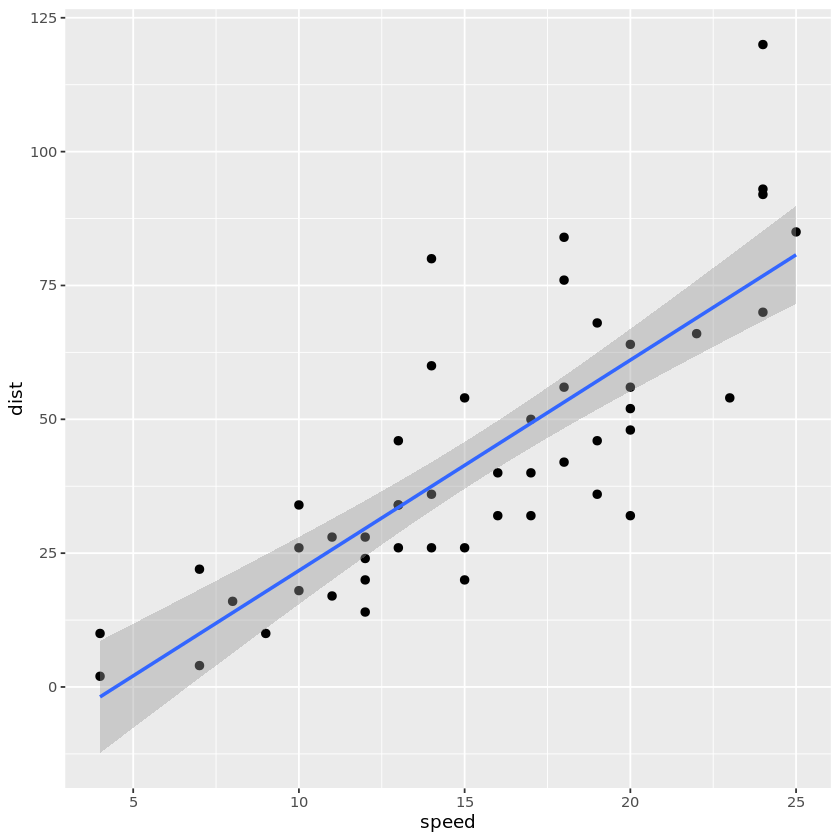

In [15]:
ggplot(cars_df) +
    aes(x = speed, y = dist) +
    geom_point(size = 2) +
    geom_smooth(method = "lm", formula = y ~ x)

## Boxplots with outliers in red

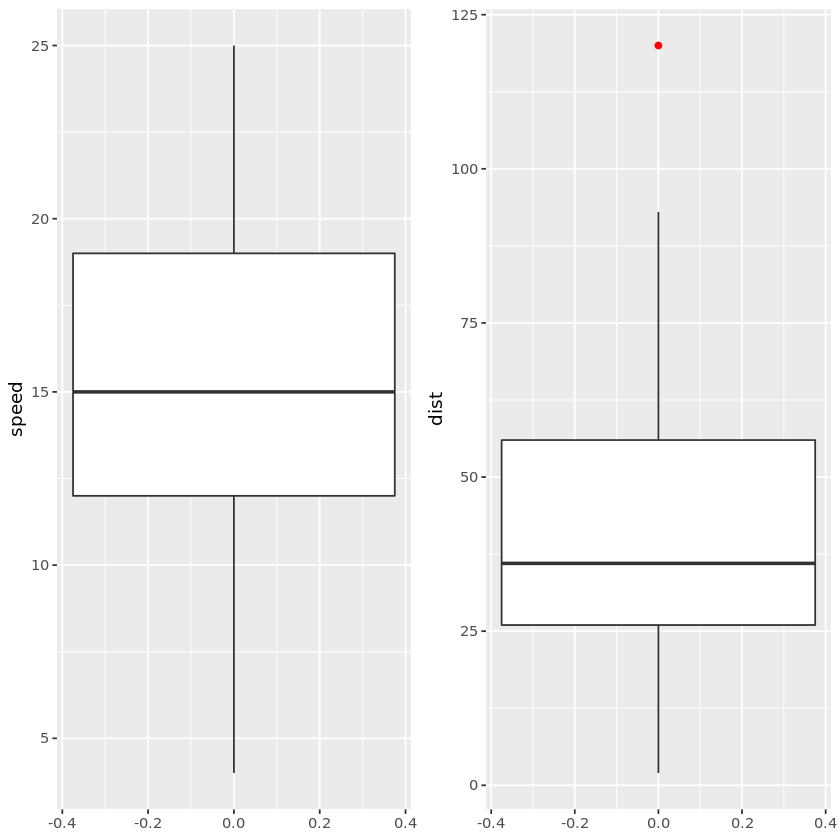

In [28]:
bp1 <- ggplot(cars_df) +
    aes(y = speed) +
    geom_boxplot(outlier.color = "red")

bp2 <- ggplot(cars_df) +
    aes(y = dist) +
    geom_boxplot(outlier.color = "red")

plot_grid(bp1, bp2, ncol = 2)

## Overlapping density plots

In [78]:
dist_skew <- round(e1071::skewness(cars_df$dist), 2)
speed_skew <- round(e1071::skewness(cars_df$speed), 2)

`summarise()` regrouping output by 'param' (override with `.groups` argument)



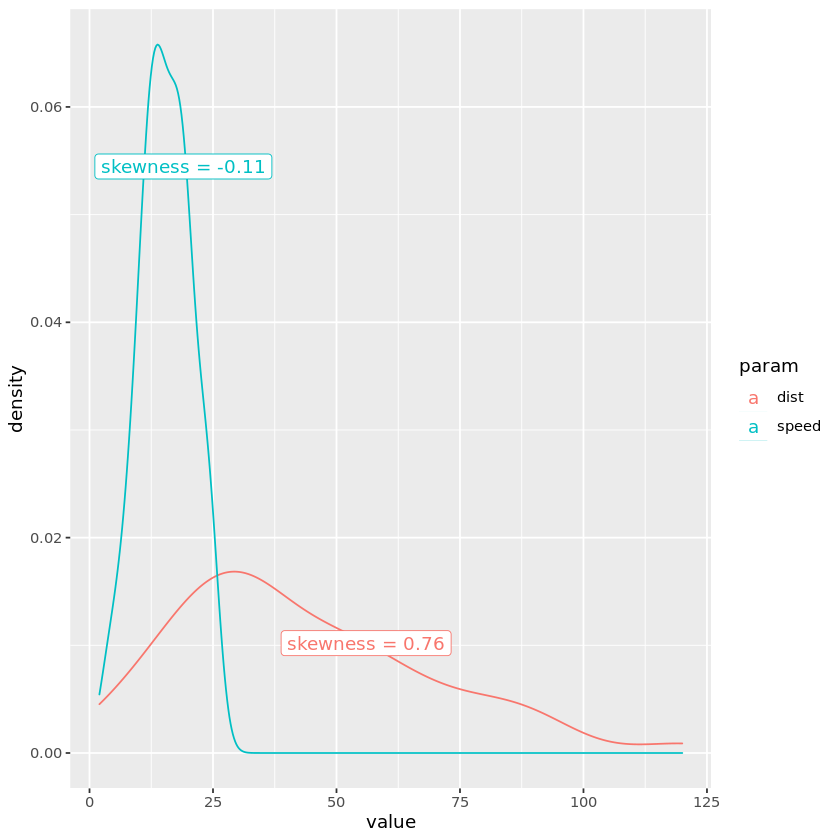

In [120]:
cars_pivot_df <- cars_df %>%
    pivot_longer(cols = c(speed, dist), names_to = "param", values_to = "value") %>%
    mutate(skew = case_when(
        param == "dist" ~ paste0("skewness = ", dist_skew),
        param == "speed" ~ paste0("skewness = ", speed_skew)
    ))

labels <- cars_pivot_df %>%
    group_by(param, skew) %>%
    summarize(xpos = quantile(value)[4], ypos = quantile(density(value)$y)[4])

ggplot() +
    geom_density(data = cars_pivot_df, aes(x = value, color = param)) +
    geom_label(data=labels, aes(x=xpos, y=ypos, label=skew, color = param))

# Correlation

In [121]:
cor(cars_df$speed, cars_df$dist)

[1] 0.8068949

# Linear model

In [170]:
model <- glm(dist ~ speed, data = cars_df, family = stats::gaussian(link = "identity"))
null_model <- glm(dist ~ 1, data = cars_df, family = stats::gaussian(link = "identity"))

In [171]:
model


Call:  glm(formula = dist ~ speed, family = stats::gaussian(link = "identity"), 
    data = cars_df)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  

Degrees of Freedom: 49 Total (i.e. Null);  48 Residual
Null Deviance:	    32540 
Residual Deviance: 11350 	AIC: 419.2

In [176]:
model_summary <- summary(model)
model_summary
resid_deviance <- model_summary$deviance
null_deviance <- model_summary$null.deviance
print(paste0("R-squared = ", round(1 - (model$deviance / model$null.deviance), 3)))
res_anova <- anova(model, null_model, test = "F")
res_anova
print(paste0("P-value of model = ", res_anova[2, 6]))


Call:
glm(formula = dist ~ speed, family = stats::gaussian(link = "identity"), 
    data = cars_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-29.069   -9.525   -2.272    9.215   43.201  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 236.5317)

    Null deviance: 32539  on 49  degrees of freedom
Residual deviance: 11354  on 48  degrees of freedom
AIC: 419.16

Number of Fisher Scoring iterations: 2


[1] "R-squared = 0.651"


,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,48,11353.52,NA,NA,NA,NA
2,49,32538.98,-1,-21185.46,89.56711,1.489836e-12


[1] "P-value of model = 1.48983649629509e-12"


In [177]:
summary.glm(model)


Call:
glm(formula = dist ~ speed, family = stats::gaussian(link = "identity"), 
    data = cars_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-29.069   -9.525   -2.272    9.215   43.201  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 236.5317)

    Null deviance: 32539  on 49  degrees of freedom
Residual deviance: 11354  on 48  degrees of freedom
AIC: 419.16

Number of Fisher Scoring iterations: 2
